In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

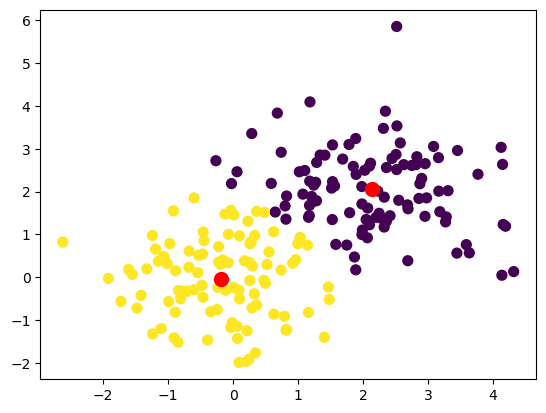

In [2]:
def k_means(X, k, centroids,n_iter=100):
    labels = np.zeros(X.shape[0])
    old_labels = None
    for i in range(n_iter):
        labels = recompute_assignments(X, k, centroids)
        if np.array_equal(labels, old_labels):
            break
        old_labels = labels
        centroids = recompute_centroids(X, k, labels)
    return labels, centroids

def recompute_centroids(X, k, labels):
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        centroids[i] = np.mean(X[labels == i], axis=0)
    return centroids

def recompute_assignments(X, k, centroids):
    labels = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        labels[i] = np.argmin(np.linalg.norm(X[i] - centroids, axis=1,ord=2))
    return labels


# generate test set of two gaussian clusters
np.random.seed(42)
X1 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], 100)
X2 = np.random.multivariate_normal([2, 2], [[1, 0], [0, 1]], 100)
X = np.vstack((X1, X2))

# run k-means
k = 2
centroids = X[np.random.choice(X.shape[0], k, replace=False), :]
labels, centroids = k_means(X, k, centroids)

# plot results
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)


## K-Medians
Now implement K-medians. Here, the centroids are made up of the median of each dimension instead of the average.
Compute the respective within cluster variations for k-means and k-medians and compare them.
Does a better objective also result in a subjectively better clustering?

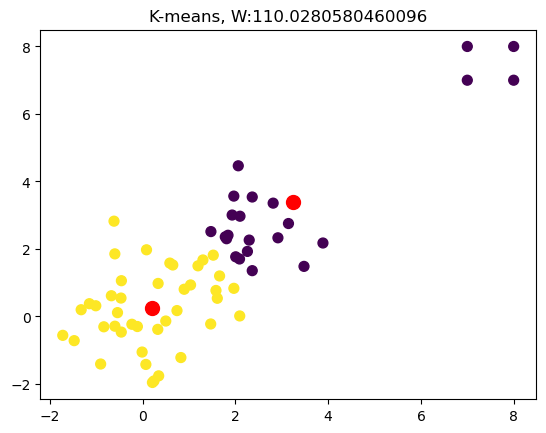

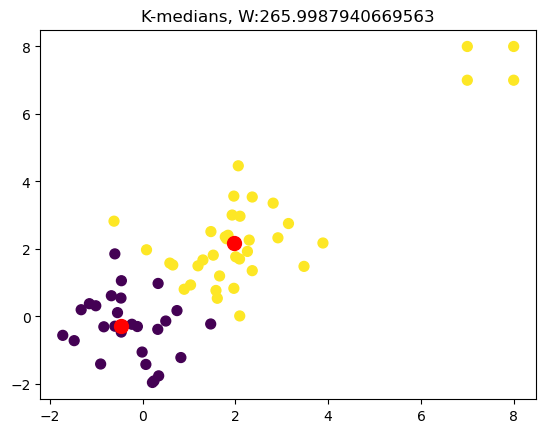

In [3]:
def k_medians(X, k, medians,n_iter=100):
    labels = np.zeros(X.shape[0])
    old_labels = None
    for i in range(n_iter):
        labels = recompute_assignments(X, k, medians)
        if np.array_equal(labels, old_labels):
            break
        old_labels = labels
        medians = recompute_medians(X, k, labels)
    return labels, medians

def recompute_medians(X, k, labels):
    medians = np.zeros((k, X.shape[1]))
    for i in range(k):
        datapoints = X[labels == i]
        for j in range(datapoints.shape[1]):
            medians[i, j] = np.median(datapoints[:, j])
    return medians


# generate test set of two gaussian clusters add noise on 
np.random.seed(42)
X1 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], 30)
X2 = np.random.multivariate_normal([2, 2], [[1, 0], [0, 1]], 30)
noise = np.array([[8,8],[8,7],[7,8],[7,7]])
X = np.vstack((X1, X2, noise))

# run k-means
k = 2
centroids = X[np.random.choice(X.shape[0], k, replace=False), :]
labels, centroids = k_means(X, k, centroids)
in_cluster_variation = 0
for i in range(k):
    in_cluster_variation += np.sum(np.linalg.norm(X[labels == i] - centroids[i], axis=1,ord=2))

# plot results
plt.figure()
plt.title('K-means, W:'+str(in_cluster_variation))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

# run k-medoids
k = 2
medians = X[np.random.choice(X.shape[0], k, replace=False), :]
labels, medians = k_medians(X, k, medians)
in_cluster_variation = 0
for i in range(k):
    in_cluster_variation += np.sum(np.linalg.norm(X[labels == i] - centroids[i], axis=1,ord=2))

# plot results
plt.figure()
plt.title('K-medians, W:'+str(in_cluster_variation))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50)
plt.scatter(medians[:, 0], medians[:, 1], c='r', s=100)



*Solution*: k-medians is outlier robust, therefore is able to find the two clusters while k-means is affected by the noise and does not.
This is opposite to the in-cluster variation objective, which is much better for K-Means.

## Moons
You now get the moons dataset for task 2.1. Perform k-means clustering and analyze the results.

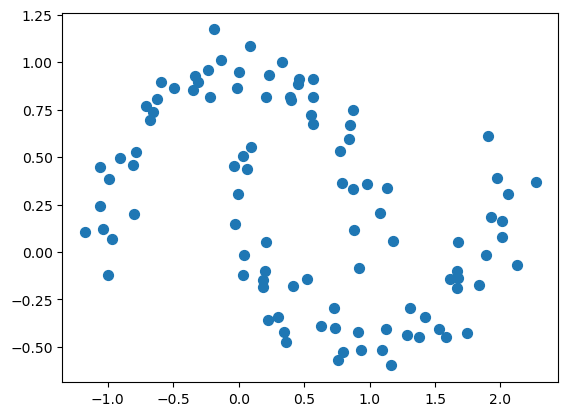

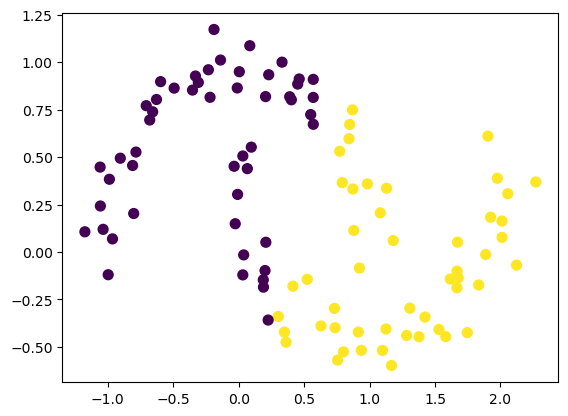

In [4]:
moons = pd.read_csv('moons.csv').to_numpy()
plt.scatter(moons[:, 0], moons[:, 1], s=50)

k = 2
centroids = np.random.choice(moons.shape[0], k, replace=False)
centroids = moons[centroids]
labels, centroids = k_means(moons, k, centroids)

plt.figure()
plt.scatter(moons[:, 0], moons[:, 1], c=labels, s=50)



*Solution*: K-Means doesnt work, the clusters are not spherical.

## Hierarchical
Instead, we turn to hierarchical clustering.
Implement both single and complete linkage clustering, plot the results and argue which is better.

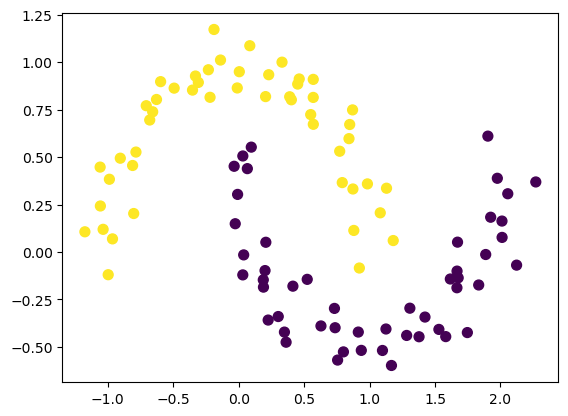

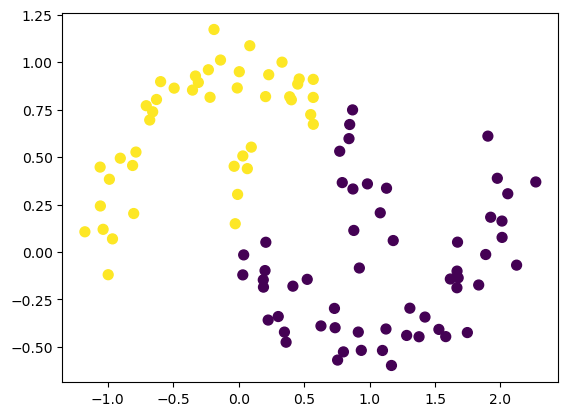

In [5]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=2,linkage='single')
hc.fit(moons)
labels = hc.labels_
plt.figure()
plt.scatter(moons[:, 0], moons[:, 1], c=labels, s=50)

hc = AgglomerativeClustering(n_clusters=2,linkage='complete')
hc.fit(moons)
labels = hc.labels_
plt.figure()
plt.scatter(moons[:, 0], moons[:, 1], c=labels, s=50)



*Solution*: just like in the assigment, single linkage is better

## Task 2
You are provided a dataset of 8x8 gray value images.
Perform both PCA and t-SNE embeddings (perplexity=10) to embed the dataset into the two dimensional space and compare the resulting low-dimensional data.
Explain, why each respective method performs better/worse.

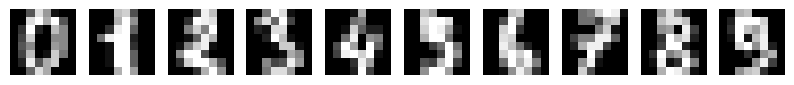

In [6]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
# plot sample images
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X[i].reshape(8, 8), cmap='gray')
    plt.axis('off')


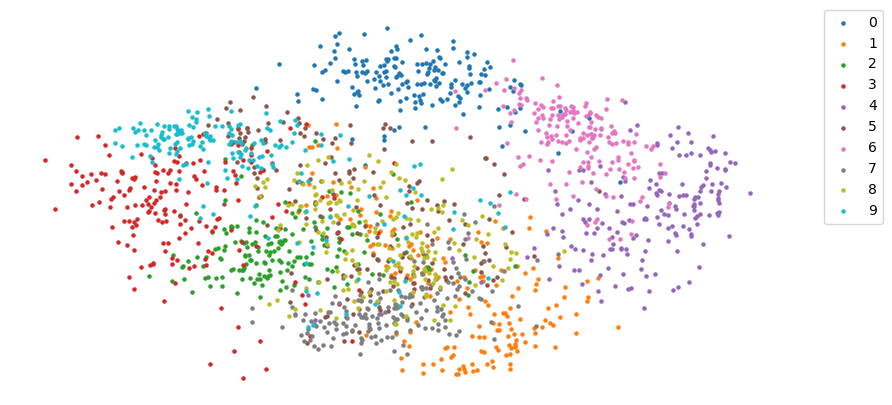

In [7]:
# do PCA here
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 5))
plt.axis('off')
for i in range(10):
    plt.scatter(X_pca[digits.target == i, 0], X_pca[digits.target == i, 1], label=i, s=5)
# legend on right side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., ncol=1, fontsize=10)

c:\Users\sasch\miniconda3\envs\EDA\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\sasch\miniconda3\envs\EDA\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


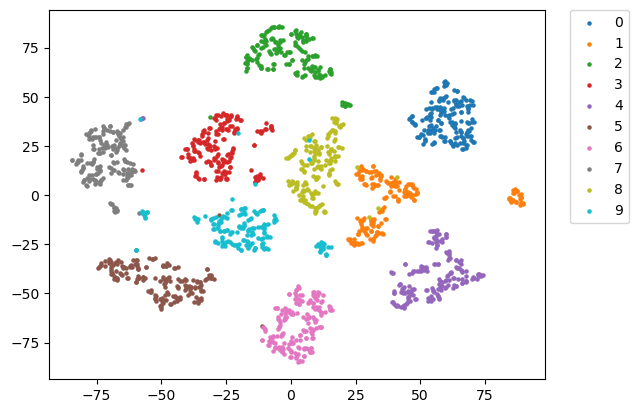

In [9]:
# tsne
tsne = TSNE(n_components=2,perplexity=10)
X_tsne = tsne.fit_transform(X)
for i in range(10):
    plt.scatter(X_tsne[digits.target == i, 0], X_tsne[digits.target == i, 1], label=i, s=5)
# legend on right side
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., ncol=1, fontsize=10)

*Solution*: t-SNE works better as PCA is a linear reduction technique, but the digits are inherently non-linear image data with geometric shapes and patterns.
t-SNE on the other hand focuses on preserving local structure, i.e.~keeping zeros close to other zeros and thus manages to separate each digit into 
separate clusters.